# Table Booking and Online Delivery Analysis

In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read in the file 
Restaurant_enterprise_data_task2= pd.read_csv(r"C:\Users\HP\Documents\cognifyz\Dataset .csv")

# look at the first few lines
Restaurant_enterprise_data_task2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
print(Restaurant_enterprise_data_task2.dtypes)
#The data types appear appropriate for the columns, with numerical values correctly identified as integers or floats, and categorical data as objects.

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [5]:
# unique value shows 9542 while shape shows 9551,,, so Total missing values in the DataFrame
total_missing = Restaurant_enterprise_data_task2.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 9


In [6]:
# Fill missing values in the 'Cuisines' column with 'Not Specified'
Restaurant_enterprise_data_task2['Cuisines'].fillna('Not Specified', inplace=True)

# Verify that there are no more missing values
missing_values_after = Restaurant_enterprise_data_task2.isnull().sum()
print(missing_values_after)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [7]:
#show columns
Restaurant_enterprise_data_task2.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
#Determining the percentage of restaurants that offer table booking and online delivery.

In [10]:
# Count the number of restaurants offering table booking ('Yes' values)
table_booking_count = Restaurant_enterprise_data_task2[Restaurant_enterprise_data_task2['Has Table booking'] == 'Yes'].shape[0]

# Count the number of restaurants offering online delivery ('Yes' values)
online_delivery_count = Restaurant_enterprise_data_task2[Restaurant_enterprise_data_task2['Has Online delivery'] == 'Yes'].shape[0]

# Total number of restaurants (rows in the dataset)
total_restaurants = len(Restaurant_enterprise_data_task2)

# Calculate percentages
table_booking_percentage = (table_booking_count / total_restaurants) * 100
online_delivery_percentage = (online_delivery_count / total_restaurants) * 100

# Display the results
print(f"Percentage of restaurants that offer table booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants that offer online delivery: {online_delivery_percentage:.2f}%")



Percentage of restaurants that offer table booking: 12.12%
Percentage of restaurants that offer online delivery: 25.66%


In [11]:
#Comparing avg rating of those with table booking to those without

# Group restaurants by whether they have table booking or not
table_booking_avg_rating = Restaurant_enterprise_data_task2.groupby('Has Table booking')['Aggregate rating'].mean()

# Display the results
print(table_booking_avg_rating)

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


In [12]:
# Group by 'Price range' and calculate the percentage of restaurants with online delivery
online_delivery_by_price = Restaurant_enterprise_data_task2.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0)

# Convert to percentage
online_delivery_by_price = online_delivery_by_price * 100

# Display the result
print(online_delivery_by_price)


Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


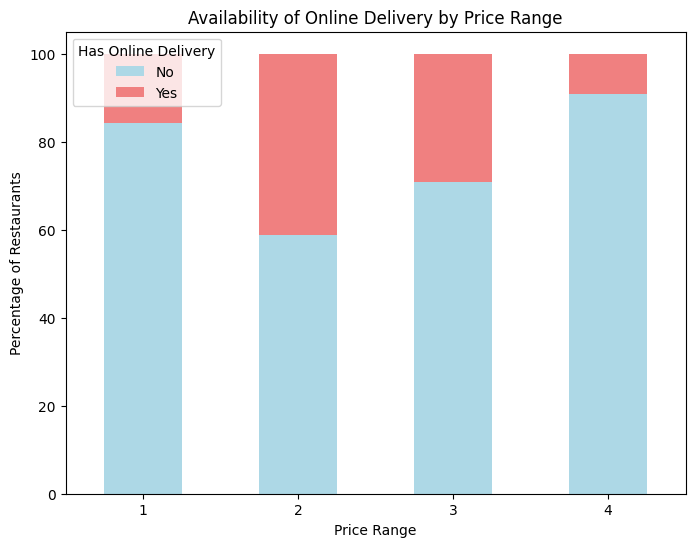

In [13]:
import matplotlib.pyplot as plt

# Plotting the comparison of online delivery availability across price ranges
online_delivery_by_price.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'lightcoral'])

plt.title('Availability of Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')
plt.xticks(rotation=0)
plt.legend(title='Has Online Delivery', labels=['No', 'Yes'])
plt.show()


# Price Range Analysis. Level2 (Task 2)

In [14]:
# Check the unique values in the 'Price range' column
print(Restaurant_enterprise_data_task2['Price range'].unique())

[3 4 2 1]


In [15]:
# Count the occurrences of each price range
price_range_counts = Restaurant_enterprise_data_task2['Price range'].value_counts()

# Display the most common price range
most_common_price_range = price_range_counts.idxmax()
most_common_count = price_range_counts.max()

# Print the result
print(f"The most common price range is {most_common_price_range} with {most_common_count} restaurants.")


The most common price range is 1 with 4444 restaurants.


In [16]:
Restaurant_enterprise_data_task2['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [17]:
# Group by 'Price range' and calculate the mean of 'Aggregate rating'
average_ratings_by_price_range = Restaurant_enterprise_data_task2.groupby('Price range')['Aggregate rating'].mean()

# Display the results
print(average_ratings_by_price_range)

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [18]:
# Group by 'Price range' and 'Rating color' and calculate the average rating
grouped_data = Restaurant_enterprise_data_task2.groupby(['Price range', 'Rating color'])['Aggregate rating'].mean().reset_index()

# Find the 'Rating color' with the highest average rating for each price range
highest_avg_rating = grouped_data.loc[grouped_data.groupby('Price range')['Aggregate rating'].idxmax()]

# Display the result
print(highest_avg_rating)

    Price range Rating color  Aggregate rating
0             1   Dark Green          4.668750
6             2   Dark Green          4.627536
12            3   Dark Green          4.646032
18            4   Dark Green          4.709459


# Feature Engineering. Level 2(Task 3)

In [21]:
#Extracting additional features from the existing columns, such as the length of the restaurant name or address.

In [22]:
# Feature 1: Length of the Restaurant Name
Restaurant_enterprise_data_task2['Restaurant Name Length'] = Restaurant_enterprise_data_task2['Restaurant Name'].apply(len)

# Feature 2: Length of the Address
Restaurant_enterprise_data_task2['Address Length'] = Restaurant_enterprise_data_task2['Address'].apply(len)

# Feature 3: Number of Cuisines (assuming cuisines are comma-separated)
Restaurant_enterprise_data_task2['Number of Cuisines'] = Restaurant_enterprise_data_task2['Cuisines'].apply(lambda x: len(str(x).split(',')))

# Feature 4: Check if Restaurant Name Contains Specific Keywords (e.g., "Cafe", "Bar")
Restaurant_enterprise_data_task2['Is Cafe'] = Restaurant_enterprise_data_task2['Restaurant Name'].str.contains('Cafe', case=False, na=False)
Restaurant_enterprise_data_task2['Is Bar'] = Restaurant_enterprise_data_task2['Restaurant Name'].str.contains('Bar', case=False, na=False)

# Display the first few rows with the new features
print(Restaurant_enterprise_data_task2[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length', 'Cuisines', 'Number of Cuisines', 'Is Cafe', 'Is Bar']].head())

          Restaurant Name  Restaurant Name Length  \
0        Le Petit Souffle                      16   
1        Izakaya Kikufuji                      16   
2  Heat - Edsa Shangri-La                      22   
3                    Ooma                       4   
4             Sambo Kojin                      11   

                                             Address  Address Length  \
0  Third Floor, Century City Mall, Kalayaan Avenu...              71   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64   

                           Cuisines  Number of Cuisines  Is Cafe  Is Bar  
0        French, Japanese, Desserts                   3    False   False  
1                          Japanese                   1    False   False  
2  Seafood, Asian, Fili

In [23]:
#Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [24]:
# Apply one-hot encoding to a categorical column
one_hot_encoded = pd.get_dummies(Restaurant_enterprise_data_task2['Has Table booking'], prefix='Table Booking')

# Add one-hot encoded columns to the DataFrame
Restaurant_enterprise_data_task2 = pd.concat([Restaurant_enterprise_data_task2, one_hot_encoded], axis=1)

# Display the updated DataFrame
print(Restaurant_enterprise_data_task2.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [25]:
Restaurant_enterprise_data_task2.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Restaurant Name Length', 'Address Length',
       'Number of Cuisines', 'Is Cafe', 'Is Bar', 'Table Booking_No',
       'Table Booking_Yes'],
      dtype='object')

In [26]:
Restaurant_enterprise_data_task2.to_csv(r"C:\Users\HP\Documents\cognifyz\model prediction restaurant data.csv")